## Diabetes Predictions

In [5]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
# dataset



In [6]:
# print(dataset['DESCR'])

In [7]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
## Independent and dependent features
X=df_diabetes
y=dataset['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
X_train.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [9]:
## correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

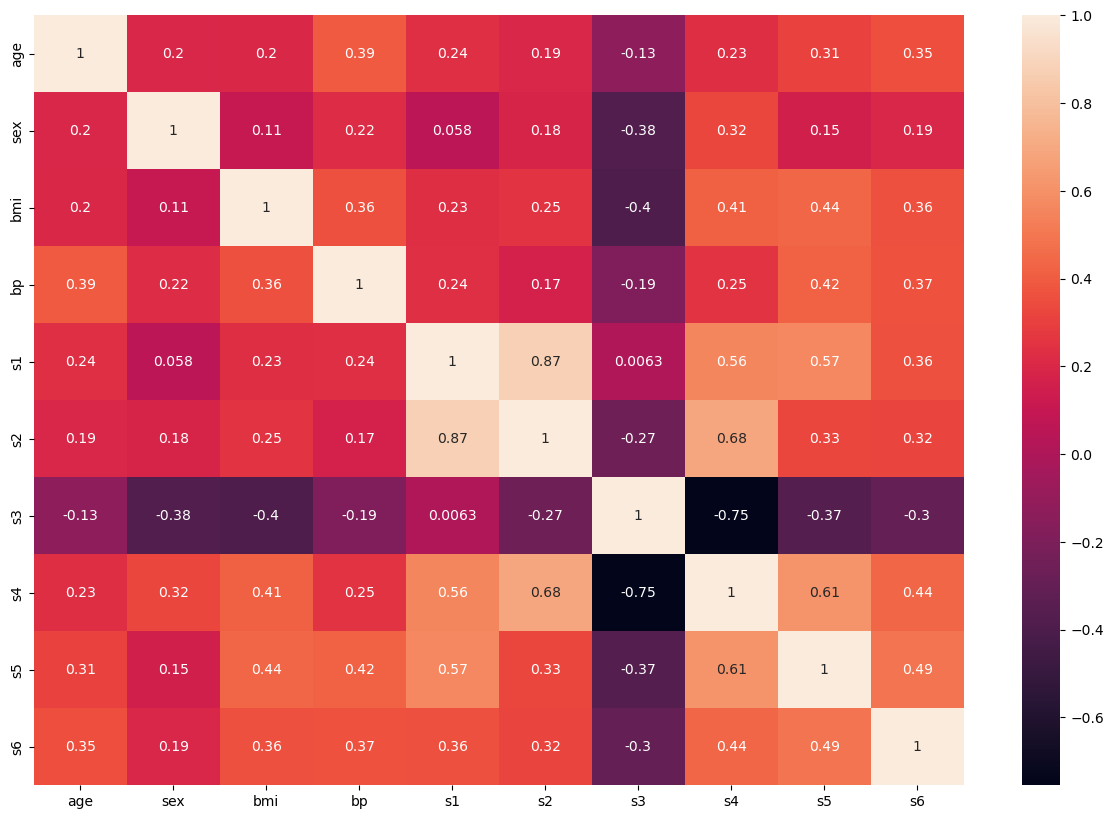

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [ ]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}
param


In [ ]:
from sklearn.model_selection import GridSearchCV
regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)



In [18]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
## predictions
y_pred=grid.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


In [26]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')
#hyperparameters
selectedmodel.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.4375, 0.9, 'x[7] <= -0.031\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.20833333333333334, 0.7, 'x[2] <= 0.105\nfriedman_mse = 3127.202\nsamples = 109\nvalue = 109.991'),
 Text(0.16666666666666666, 0.5, 'x[2] <= -0.049\nfriedman_mse = 2948.664\nsamples = 108\nvalue = 108.611'),
 Text(0.08333333333333333, 0.3, 'x[2] <= -0.052\nfriedman_mse = 1458.32\nsamples = 33\nvalue = 86.273'),
 Text(0.041666666666666664, 0.1, 'friedman_mse = 1494.345\nsamples = 31\nvalue = 84.903'),
 Text(0.125, 0.1, 'friedman_mse = 420.25\nsamples = 2\nvalue = 107.5'),
 Text(0.25, 0.3, 'x[8] <= -0.043\nfriedman_mse = 3288.246\nsamples = 75\nvalue = 118.44'),
 Text(0.20833333333333334, 0.1, 'friedman_mse = 2088.422\nsamples = 26\nvalue = 95.962'),
 Text(0.2916666666666667, 0.1, 'friedman_mse = 3514.518\nsamples = 49\nvalue = 130.367'),
 Text(0.25, 0.5, 'friedman_mse = 0.0\nsamples = 1\nvalue = 259.0'),
 Text(0.6666666666666666, 0.7, 'x[2] <= 0.024\nfriedman_mse = 5652.304\nsamples = 2

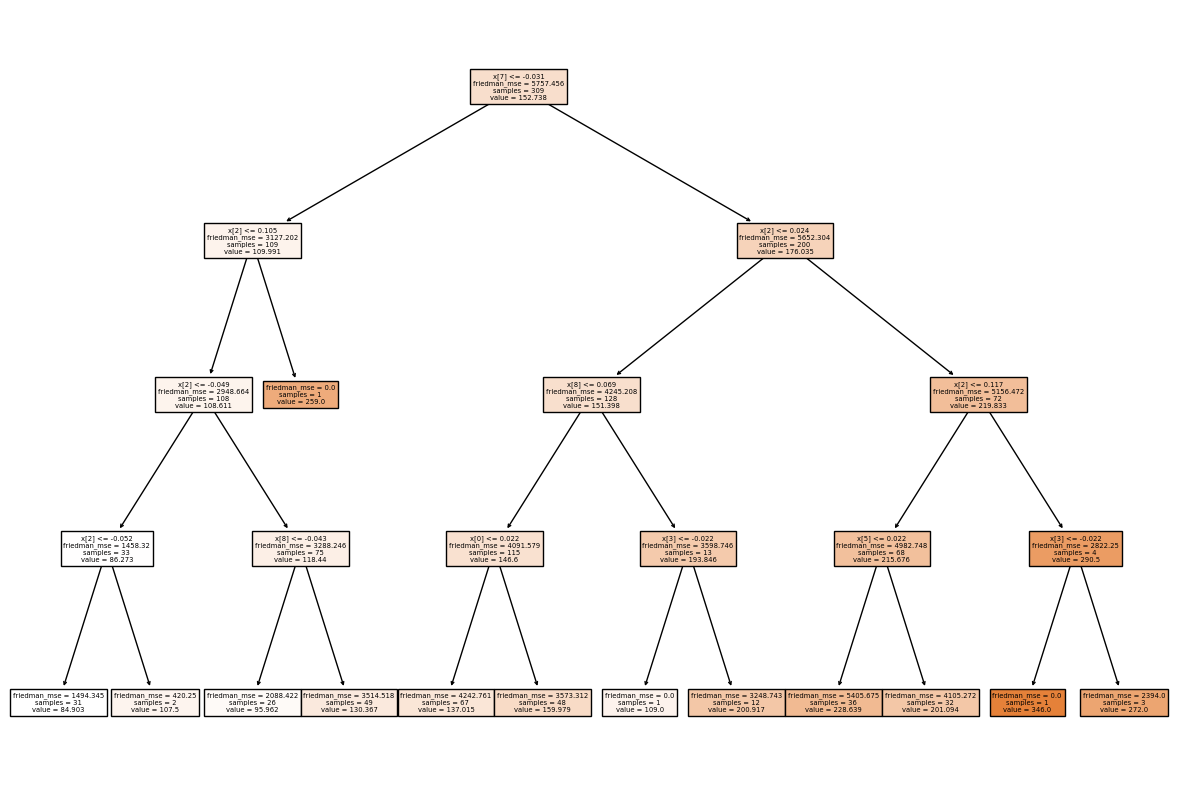

In [24]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)